In [28]:
import os
import pandas as pd
import yfinance as yf
from pathlib import Path
import matplotlib.pyplot as plt

In [29]:
data_dir = Path("tests/data")
data_dir.mkdir(exist_ok=True)

test_cases = {
    "AAPL": "Stock (Apple)",
    "^GSPC": "S&P 500 Index",
    "BTC-USD": "Cryptocurrency (Bitcoin)",
    "EURUSD=X": "Forex (EUR/USD)"
}

In [ ]:
def explore_yahoo_data(symbol):
    print(f"\n🔍 Exploring {symbol} ({test_cases[symbol]})")

    ticker = yf.Ticker(symbol)
    hist = ticker.history(period="6mo")
    print(hist.head(), "\n")

    filename = data_dir/f"{symbol}_sample_yahoo.csv"
    hist.to_csv(filename, sep=",")
    print(f"💾 Saved: {filename}\n")

    info = ticker.info
    print(f"ℹ️ Info keys: {list(info.keys())[:10]} ...\n")
    
    actions = ticker.actions
    print("🏦 Corporate actions:")
    print(actions.tail(), "\n")
    
    news = ticker.news
    print(f"📰 News items: {len(news)}\n")
    
    print("📊 Column summary:")
    print(hist.describe(include="all").T)
    
    print("\n📁 Data types:")
    print(hist.dtypes, "\n")
    
    if not hist.empty:
        plt.figure(figsize=(10, 4))
        plt.plot(hist.index, hist['Close'], label='Close', lw=2)
        plt.title(f"{symbol} - Close Price (6M)")
        plt.legend()
        plt.grid(True)
        plt.show()
    
    return {
        "symbol": symbol,
        "type": test_cases[symbol],
        "history_shape": hist.shape,
        "columns": list(hist.columns),
        "info_keys": list(info.keys())[:10]
    }


🔍 Exploring AAPL (Stock (Apple))
                                 Open        High         Low       Close  \
Date                                                                        
2025-04-11 00:00:00-04:00  185.645589  199.052758  185.605678  197.666153   
2025-04-14 00:00:00-04:00  210.923715  212.420052  200.668818  202.025497   
2025-04-15 00:00:00-04:00  201.367093  203.013058  199.312126  201.646408   
2025-04-16 00:00:00-04:00  197.875648  200.209931  191.900269  193.795639   
2025-04-17 00:00:00-04:00  196.718487  198.344512  193.945277  196.499023   

                              Volume  Dividends  Stock Splits  
Date                                                           
2025-04-11 00:00:00-04:00   87435900        0.0           0.0  
2025-04-14 00:00:00-04:00  101352900        0.0           0.0  
2025-04-15 00:00:00-04:00   51343900        0.0           0.0  
2025-04-16 00:00:00-04:00   59732400        0.0           0.0  
2025-04-17 00:00:00-04:00   52164700      

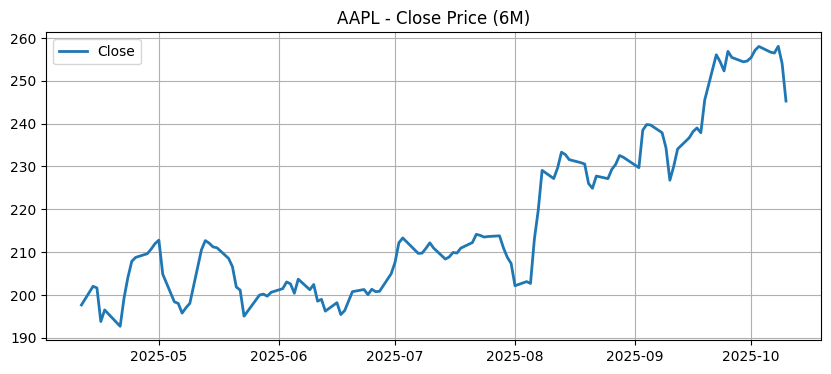


🔍 Exploring ^GSPC (S&P 500 Index)
                                  Open         High          Low        Close  \
Date                                                                            
2025-04-11 00:00:00-04:00  5255.560059  5381.459961  5220.770020  5363.359863   
2025-04-14 00:00:00-04:00  5441.959961  5459.459961  5358.020020  5405.970215   
2025-04-15 00:00:00-04:00  5411.990234  5450.410156  5386.439941  5396.629883   
2025-04-16 00:00:00-04:00  5335.750000  5367.240234  5220.790039  5275.700195   
2025-04-17 00:00:00-04:00  5305.450195  5328.310059  5255.580078  5282.700195   

                               Volume  Dividends  Stock Splits  
Date                                                            
2025-04-11 00:00:00-04:00  5602550000        0.0           0.0  
2025-04-14 00:00:00-04:00  5031440000        0.0           0.0  
2025-04-15 00:00:00-04:00  4317110000        0.0           0.0  
2025-04-16 00:00:00-04:00  4607750000        0.0           0.0  
2025-04

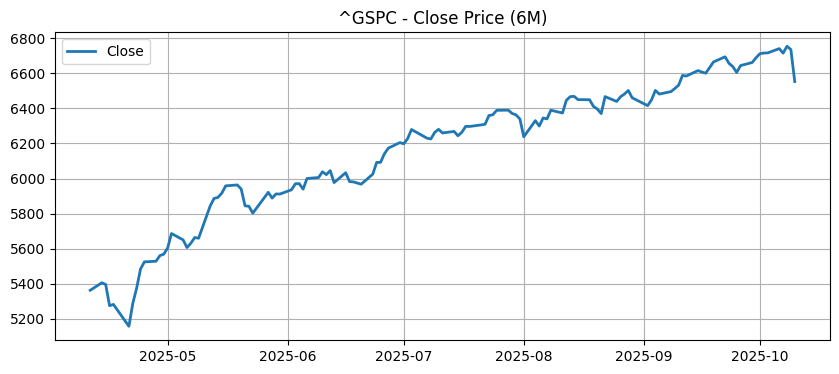


🔍 Exploring BTC-USD (Cryptocurrency (Bitcoin))
                                   Open          High           Low  \
Date                                                                  
2025-04-11 00:00:00+00:00  79625.046875  84247.476562  78936.320312   
2025-04-12 00:00:00+00:00  83404.515625  85856.187500  82769.375000   
2025-04-13 00:00:00+00:00  85279.468750  86015.187500  83027.007812   
2025-04-14 00:00:00+00:00  83694.523438  85785.000000  83690.640625   
2025-04-15 00:00:00+00:00  84539.695312  86429.351562  83598.820312   

                                  Close       Volume  Dividends  Stock Splits  
Date                                                                           
2025-04-11 00:00:00+00:00  83404.835938  41656778779        0.0           0.0  
2025-04-12 00:00:00+00:00  85287.109375  24258059104        0.0           0.0  
2025-04-13 00:00:00+00:00  83684.976562  28796984817        0.0           0.0  
2025-04-14 00:00:00+00:00  84542.390625  34090769777  

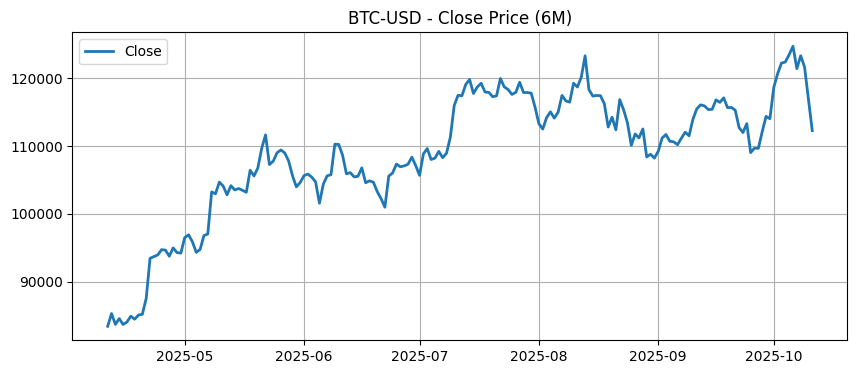


🔍 Exploring EURUSD=X (Forex (EUR/USD))
                               Open      High       Low     Close  Volume  \
Date                                                                        
2025-04-10 00:00:00+01:00  1.095206  1.122536  1.095314  1.095206       0   
2025-04-11 00:00:00+01:00  1.125784  1.147184  1.125087  1.125784       0   
2025-04-14 00:00:00+01:00  1.134314  1.142478  1.129969  1.134314       0   
2025-04-15 00:00:00+01:00  1.133967  1.137786  1.128566  1.133967       0   
2025-04-16 00:00:00+01:00  1.129267  1.139017  1.129420  1.129267       0   

                           Dividends  Stock Splits  
Date                                                
2025-04-10 00:00:00+01:00        0.0           0.0  
2025-04-11 00:00:00+01:00        0.0           0.0  
2025-04-14 00:00:00+01:00        0.0           0.0  
2025-04-15 00:00:00+01:00        0.0           0.0  
2025-04-16 00:00:00+01:00        0.0           0.0   

💾 Saved: tests\data\EURUSD=X_sample.csv

ℹ️ Inf

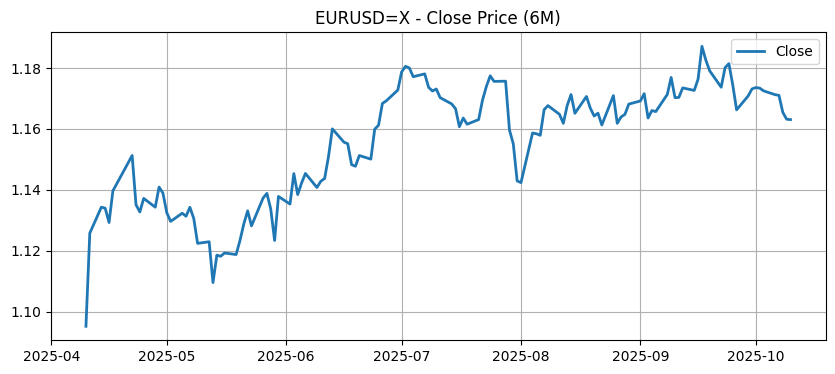


✅ Summary of available data:


,symbol,type,history_shape,columns,info_keys
0,AAPL,Stock (Apple),"(126, 7)","[Open, High, Low, Close, Volume, Dividends, St...","[address1, city, state, zip, country, phone, w..."
1,^GSPC,S&P 500 Index,"(126, 7)","[Open, High, Low, Close, Volume, Dividends, St...","[maxAge, priceHint, previousClose, open, dayLo..."
2,BTC-USD,Cryptocurrency (Bitcoin),"(183, 7)","[Open, High, Low, Close, Volume, Dividends, St...","[companyOfficers, name, startDate, description..."
3,EURUSD=X,Forex (EUR/USD),"(130, 7)","[Open, High, Low, Close, Volume, Dividends, St...","[maxAge, priceHint, previousClose, open, dayLo..."


In [31]:
results = []
for symbol in test_cases:
    try:
        res = explore_yahoo_data(symbol)
        results.append(res)
    except Exception as e:
        print(f"Error with {symbol}: {e}")
        
summary = pd.DataFrame(results)
print("\n✅ Summary of available data:")
display(summary)
